In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.metrics import r2_score

ImportError: cannot import name 'Imputer' from 'sklearn.preprocessing' (/home/hansolo/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/__init__.py)

In [ ]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [ ]:
df = pd.read_csv("train.csv")

In [2]:
df.NU_NOTA_MT.isna().sum()

NameError: name 'df' is not defined

In [5]:
df.dropna(subset=["NU_NOTA_MT"],inplace=True)

In [6]:
df = df[['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']]

In [7]:
df.shape

(10133, 48)

In [8]:
df.describe()

,CO_UF_RESIDENCIA,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,3639.000000,10133.000000,3639.000000,10133.000000,10133.0,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.0,10097.000000,10097.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000,10133.000000
mean,30.534985,20.584427,2.172900,1.045199,1.811211,1.732754,1.412908,1.132729,0.148525,2.289090,0.001086,0.0,0.000395,0.000099,0.000099,0.009869,0.000395,0.000099,0.997237,0.997237,1.0,473.912509,530.346123,516.472841,482.497928,0.579098,1.101747,119.811704,111.915918,106.824238,113.123951,77.372446,529.048258
std,9.815948,6.359268,1.004877,0.254315,0.831302,2.894655,0.591624,0.491515,0.355637,0.733229,0.032932,0.0,0.019865,0.009934,0.009934,0.098855,0.019865,0.009934,0.059544,0.059544,0.0,71.098468,73.528309,68.688190,99.826323,0.493728,0.700100,29.846017,33.737588,34.341349,33.480033,43.067140,154.294758
min,11.000000,13.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,17.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,420.100000,481.000000,468.100000,408.900000,0.000000,1.000000,120.000000,100.000000,80.000000,100.000000,40.000000,440.000000
50%,31.000000,18.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,460.400000,532.600000,520.900000,461.200000,1.000000,1.000000,120.000000,120.000000,120.000000,120.000000,80.000000,540.000000
75%,35.000000,21.000000,3.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,515.100000,581.900000,564.900000,537.600000,1.000000,1.000000,140.000000,120.000000,120.000000,120.000000,100.000000,600.000000
max,53.000000,66.000000,5.000000,4.000000,4.000000,10.000000,4.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.0,806.400000,807.000000,763.600000,952.000000,1.000000,9.000000,200.000000,200.000000,200.000000,200.000000,200.000000,1000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Data columns (total 48 columns):
NU_INSCRICAO              10133 non-null object
CO_UF_RESIDENCIA          10133 non-null int64
SG_UF_RESIDENCIA          10133 non-null object
NU_IDADE                  10133 non-null int64
TP_SEXO                   10133 non-null object
TP_COR_RACA               10133 non-null int64
TP_NACIONALIDADE          10133 non-null int64
TP_ST_CONCLUSAO           10133 non-null int64
TP_ANO_CONCLUIU           10133 non-null int64
TP_ESCOLA                 10133 non-null int64
TP_ENSINO                 3639 non-null float64
IN_TREINEIRO              10133 non-null int64
TP_DEPENDENCIA_ADM_ESC    3639 non-null float64
IN_BAIXA_VISAO            10133 non-null int64
IN_CEGUEIRA               10133 non-null int64
IN_SURDEZ                 10133 non-null int64
IN_DISLEXIA               10133 non-null int64
IN_DISCALCULIA            10133 non-null int64
IN_SABATISTA              10133 non-null

In [10]:
df.columns.to_list()

['NU_INSCRICAO',
 'CO_UF_RESIDENCIA',
 'SG_UF_RESIDENCIA',
 'NU_IDADE',
 'TP_SEXO',
 'TP_COR_RACA',
 'TP_NACIONALIDADE',
 'TP_ST_CONCLUSAO',
 'TP_ANO_CONCLUIU',
 'TP_ESCOLA',
 'TP_ENSINO',
 'IN_TREINEIRO',
 'TP_DEPENDENCIA_ADM_ESC',
 'IN_BAIXA_VISAO',
 'IN_CEGUEIRA',
 'IN_SURDEZ',
 'IN_DISLEXIA',
 'IN_DISCALCULIA',
 'IN_SABATISTA',
 'IN_GESTANTE',
 'IN_IDOSO',
 'TP_PRESENCA_CN',
 'TP_PRESENCA_CH',
 'TP_PRESENCA_LC',
 'CO_PROVA_CN',
 'CO_PROVA_CH',
 'CO_PROVA_LC',
 'CO_PROVA_MT',
 'NU_NOTA_CN',
 'NU_NOTA_CH',
 'NU_NOTA_LC',
 'NU_NOTA_MT',
 'TP_LINGUA',
 'TP_STATUS_REDACAO',
 'NU_NOTA_COMP1',
 'NU_NOTA_COMP2',
 'NU_NOTA_COMP3',
 'NU_NOTA_COMP4',
 'NU_NOTA_COMP5',
 'NU_NOTA_REDACAO',
 'Q001',
 'Q002',
 'Q006',
 'Q024',
 'Q025',
 'Q026',
 'Q027',
 'Q047']

In [11]:
df

,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,16f84b7b3d2aeaff7d2f01297e6b3d0e25c77bb2,9cd70f1b922e02bd33453b3f607f5a644fb9b1b8,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,436.3,495.4,581.2,399.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,474.5,544.1,599.0,459.8,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A
5,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,29,BA,18,F,1,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,439.7,583.2,410.9,364.5,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,E,E,C,B,B,A,NaN,A
6,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,51,MT,18,F,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,420.1,604.2,484.5,529.2,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,E,D,C,B,B,C,E,A
7,2eb189d4912f64b19d1967e8e84b6141aba18770,43,RS,18,F,1,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,72f80e4b3150c627c7ffc93cfe0fa13a9989b610,577f8968d95046f5eb5cc158608e12fa9ba34c85,619.6,625.8,611.2,566.7,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,G,F,L,B,B,A,NaN,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,aadf671ef8c1c6efa42e69432093ab83c17a52ac,35,SP,20,M,1,1,1,3,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,01af53cd161a420fff1767129c10de560cc264dd,97caab1e1533dba217deb7ef41490f52e459ab01,438.2,419.7,394.5,403.2,0,1.0,120.0,120.0,80.0,80.0,40.0,440.0,E,E,G,B,B,B,C,A
13726,461f7ef2753d9d5fa0b054930d6b0e0eec318e81,26,PE,33,F,3,2,1,10,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,b9b06ce8c319a3df2158ea3d0aef0f7d3eecaed7,909237ab0d84688e10c0470e2997348aff585273,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,423.8,557.9,533.0,452.4,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,A,A,C,A,B,B,I,A
13727,5354503700ecf2388f68990435390b6e1ad454ee,43,RS,15,F,1,1,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,c8328ebc6f3238e06076c481bc1b82b8301e7a3f,f48d390ab6a2428e659c37fb8a9d00afde621889,01abbb7f1a90505385f44eec9905f82ca2a42cfd,81d0ee00ef42a7c23eb04496458c03d4c5b9c31a,460.5,528.9,569.3,398.0,0,1.0,120.0,120.0,120.0,120.0,120.0,600.0,C,G,B,A,B,A,NaN,A
13728,c7a9e94a42bd76b7978f13c013a61702e36cc42c,33,RJ,36,M,3,1,4,0,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,66b1dad288e13be0992bae01e81f71eca1c6e8a6,942ab3dc020af4cf53740b6b07e9dd7060b24164,5aebe5cad7fabc1545ac7fba07a4e6177f98483c,767a32545304ed293242d528f54d4edb1369f910,422.5,621.7,569.0,386.6,1,1.0,100.0,100.0,80.0,80.0,100.0,460.0,B,D,G,B,B,C,E,A


In [12]:
anom_columns = ["NU_INSCRICAO","CO_PROVA_CN","CO_PROVA_CH","CO_PROVA_LC","CO_PROVA_MT","CO_UF_RESIDENCIA"]
cat_variables = ["SG_UF_RESIDENCIA","TP_SEXO","Q001","Q002","Q006","Q024","Q025","Q026","Q027","Q047"]

In [13]:
df_nop = df.drop(anom_columns,axis=1)

In [14]:
df_dum = pd.get_dummies(df_nop, columns=cat_variables, drop_first=True)

In [15]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10133 entries, 0 to 13729
Columns: 112 entries, NU_IDADE to Q047_E
dtypes: float64(13), int64(19), uint8(80)
memory usage: 3.3 MB


In [16]:
df_dum

,NU_IDADE,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,SG_UF_RESIDENCIA_AL,SG_UF_RESIDENCIA_AM,SG_UF_RESIDENCIA_AP,SG_UF_RESIDENCIA_BA,SG_UF_RESIDENCIA_CE,SG_UF_RESIDENCIA_DF,SG_UF_RESIDENCIA_ES,SG_UF_RESIDENCIA_GO,SG_UF_RESIDENCIA_MA,SG_UF_RESIDENCIA_MG,SG_UF_RESIDENCIA_MS,SG_UF_RESIDENCIA_MT,SG_UF_RESIDENCIA_PA,SG_UF_RESIDENCIA_PB,SG_UF_RESIDENCIA_PE,SG_UF_RESIDENCIA_PI,SG_UF_RESIDENCIA_PR,SG_UF_RESIDENCIA_RJ,SG_UF_RESIDENCIA_RN,SG_UF_RESIDENCIA_RO,SG_UF_RESIDENCIA_RR,SG_UF_RESIDENCIA_RS,SG_UF_RESIDENCIA_SC,SG_UF_RESIDENCIA_SE,SG_UF_RESIDENCIA_SP,SG_UF_RESIDENCIA_TO,TP_SEXO_M,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q006_B,Q006_C,Q006_D,Q006_E,Q006_F,Q006_G,Q006_H,Q006_I,Q006_J,Q006_K,Q006_L,Q006_M,Q006_N,Q006_O,Q006_P,Q006_Q,Q024_B,Q024_C,Q024_D,Q024_E,Q025_B,Q026_B,Q026_C,Q027_B,Q027_C,Q027_D,Q027_E,Q027_F,Q027_G,Q027_H,Q027_I,Q027_J,Q027_K,Q027_L,Q027_M,Q047_B,Q047_C,Q047_D,Q047_E
0,24,1,1,1,4,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,436.3,495.4,581.2,399.4,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,17,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,474.5,544.1,599.0,459.8,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,18,1,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,439.7,583.2,410.9,364.5,0,1.0,120.0,120.0,120.0,160.0,100.0,620.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,18,3,1,2,0,2,1.0,0,2.0,0,0,0,0,0,0,0,0,1,1,1,420.1,604.2,484.5,529.2,0,1.0,100.0,120.0,120.0,120.0,100.0,560.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,18,1,1,1,1,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,619.6,625.8,611.2,566.7,0,1.0,140.0,120.0,120.0,120.0,120.0,620.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,20,1,1,1,3,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,438.2,419.7,394.5,403.2,0,1.0,120.0,120.0,80.0,80.0,40.0,440.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13726,33,3,2,1,10,1,NaN,0,NaN,0,0,0,0,0,0,0,0,1,1,1,423.8,557.9,533.0,452.4,1,1.0,120.0,120.0,120.0,120.0,80.0,560.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
13727,15,1,1,3,0,1,NaN,1,NaN,0,0,0,0,0,0,0,0,1,1,1,460.5,528.9,569.3,398.0,0,1.0,120.0,120.0,120.0,120.0,120.0,600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13728,36,3,1,4,0,1,NaN,0,NaN,

In [57]:
X, y = df_dum.drop("NU_NOTA_MT",axis=1),df_dum["NU_NOTA_MT"]
#imputer = Imputer()
#X = imputer.fit_transform(X)
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\Users\lucas\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\lucas\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [154]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 10, alpha = 10, n_estimators = 50)

In [155]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

C:\Users\lucas\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [156]:
y_test.shape

(2027,)

In [158]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
MSE = np.square(np.subtract(y_test,preds)).mean()
r2 = r2_score(y_test,preds)
print("RMSE: %f" % (rmse))
print("MSE: %f" % (MSE))
print("r2: %f" % (r2))

RMSE: 74.886626
MSE: 5608.006741
r2: 0.453310


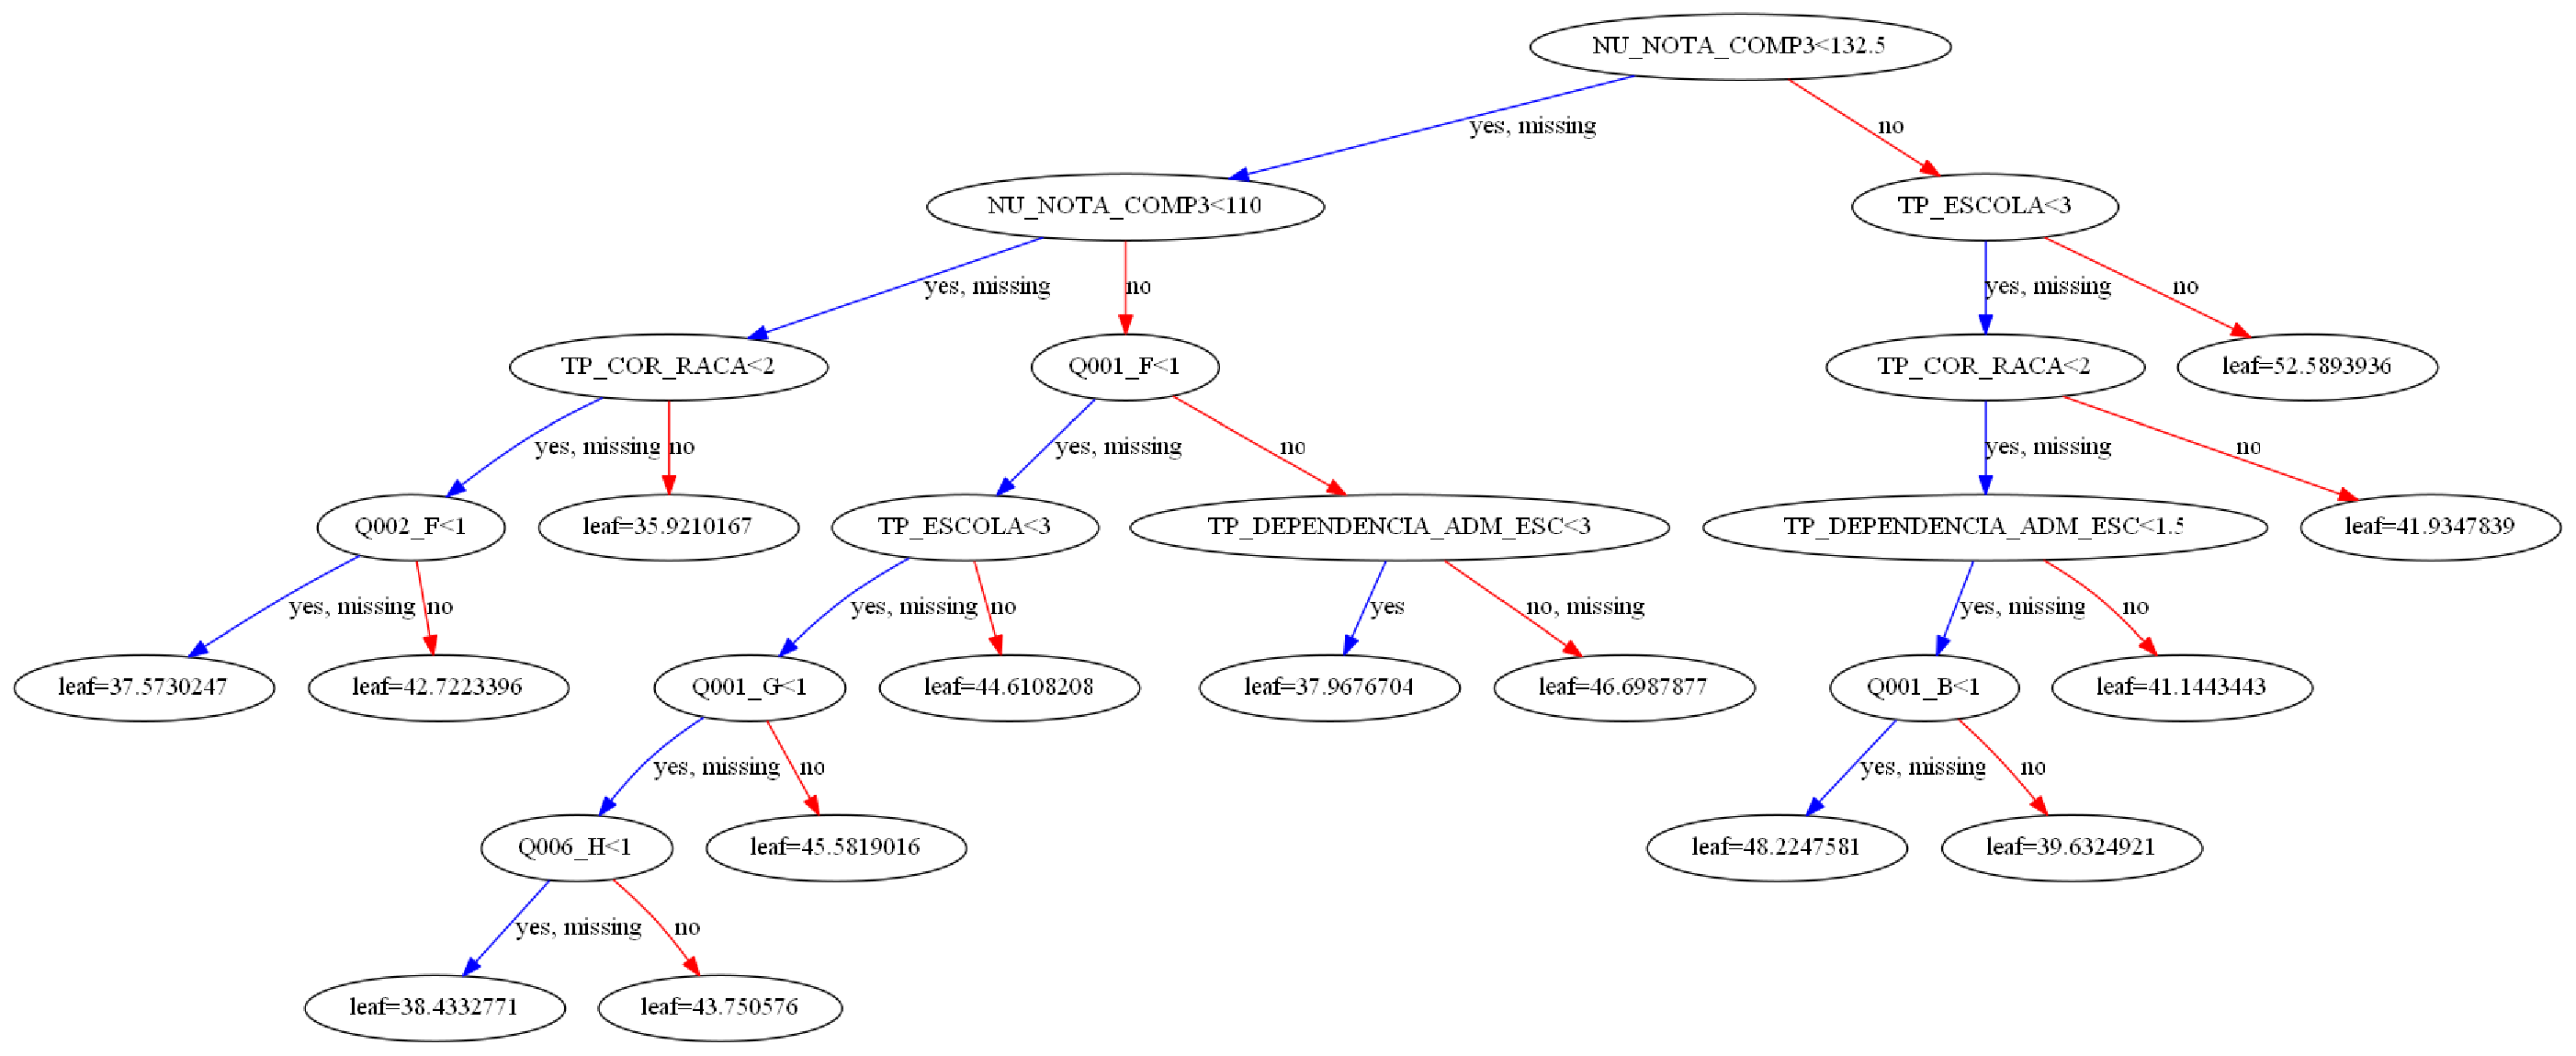

In [49]:
import matplotlib.pyplot as plt

#params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                'max_depth': 5, 'alpha': 10}
#xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

xgb.plot_tree(xg_reg,num_trees=2)
plt.rcParams['figure.figsize'] = [50, 50]
plt.show()

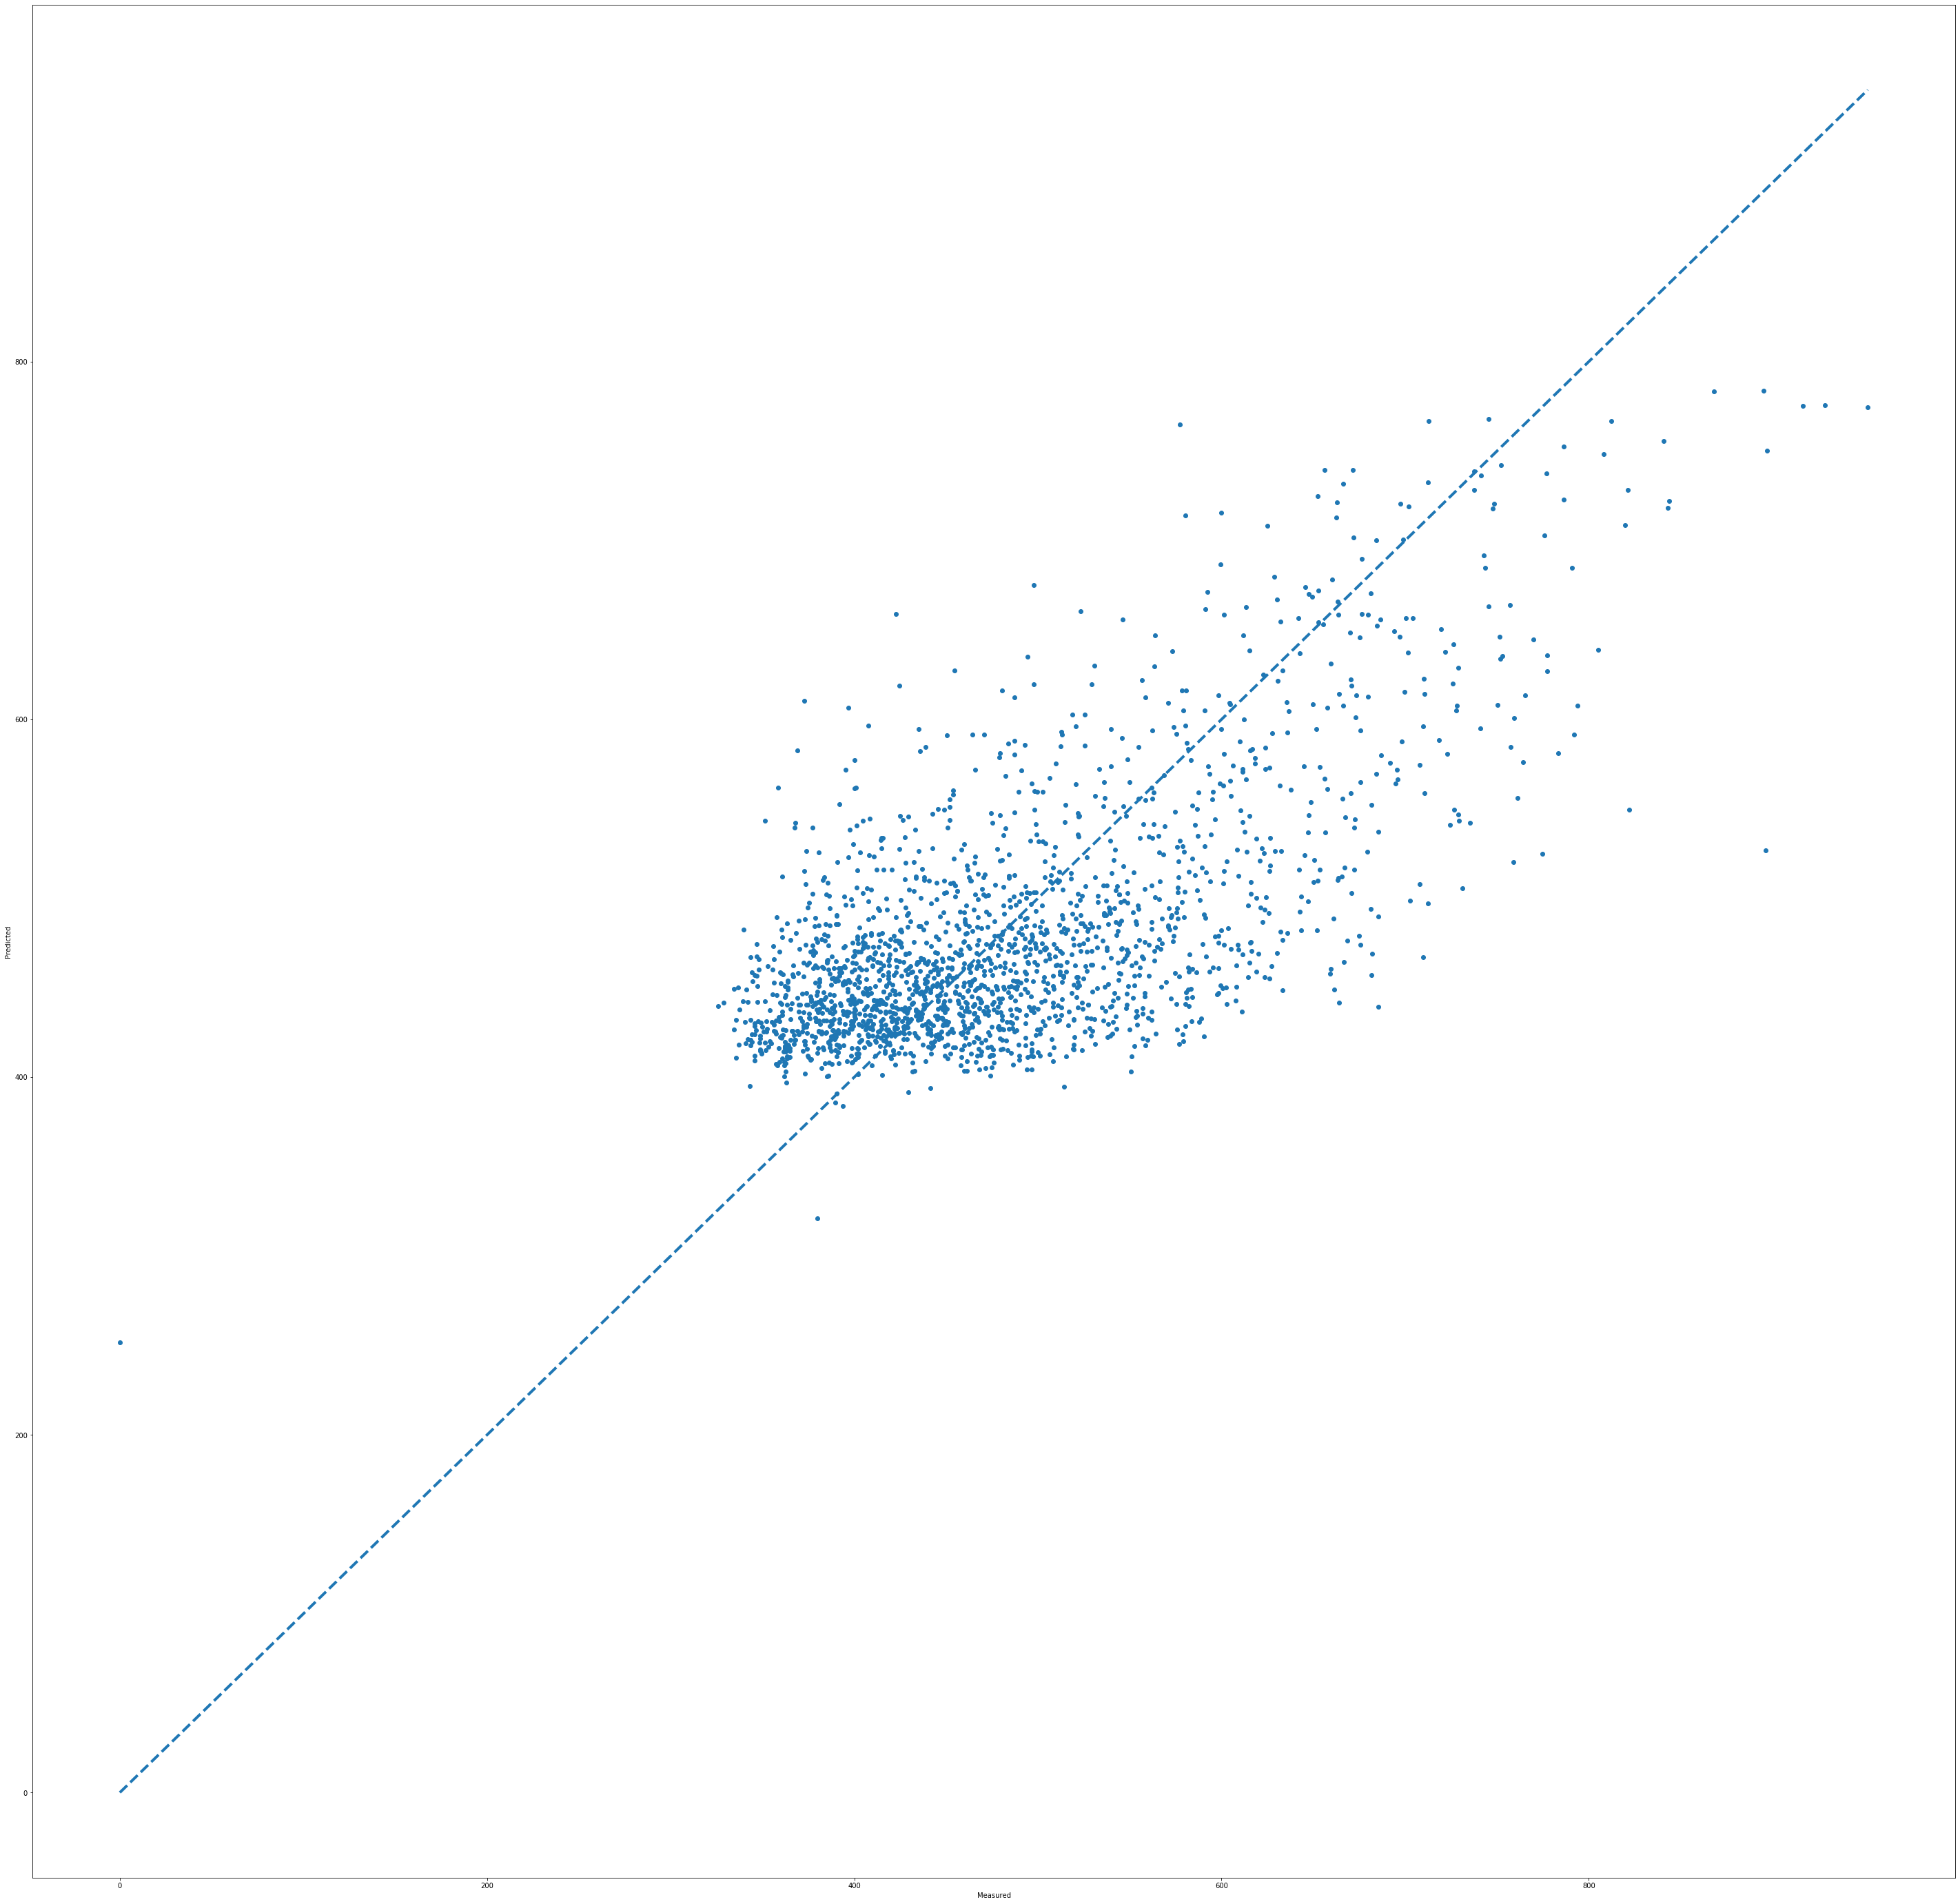

In [163]:
fig, ax = plt.subplots()
ax.scatter(y_test, preds)
y=y_test
ax.plot([y.min(), y.max()], [y.min(), y.max()], '--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()